# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 3: Planetary Motions
## 03.03.2019

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
from matplotlib.animation import FuncAnimation
import time
import imageio
import os, shutil
from matplotlib.patches import Circle

In [3]:
sns.set_style(style='whitegrid')

### Planets

In [84]:
Planets:{
    'Mercury': [0.466697, 0.205630],
    'Venus': [0.728213, 0.006772],
    'Earth': [1.017, 0.0167086],
    'Mars': [1.666, 0.0934],
    'Jupiter': [5.4588, 0.0489],
    'Saturn': [10.1238, 0.0565],
    'Uranus': [20.11, 0.046381],
    'Neptune': [30.33, 0.009456],
    'Pluto': [49.305, 0.2488],
    'Halley': [35.082, 0.96714]
}

## Initial conditions

In [68]:
choosen_planet = 'Jupiter'
# Aphelion distance in AU
r_ap = Planets[choosen_planet][0]
# Eccentricity
ecc = Planets[choosen_planet][1]
# Number of periods
periods = 100
# Step size
dt = 1
# Adaptive accuracy of simulation
accuracy = 1e-06

# Calculated orbit parameters
a = r_ap / (1 + ecc)
b = np.sqrt(1 - ecc**2) * a

# Others
steps = 1
image_dpi = 150
image_format = 'png'
image_path = '..\\Documentation\\src\\images\\'

In [69]:
def mode_choose():
    
    current_mode = ('..\Release\kepler.exe ' +
                    str(r_ap) + ' ' +
                    str(ecc) + ' ' +
                    str(periods) + ' ' +
                    str(dt) + ' ' +
                    str(accuracy)
                )

    return(current_mode)

In [70]:
current_mode = mode_choose()
os.system(current_mode)
data_fix = np.genfromtxt('fixed.dat')
data_adaptive = np.genfromtxt('adaptive.dat')

## First plotting

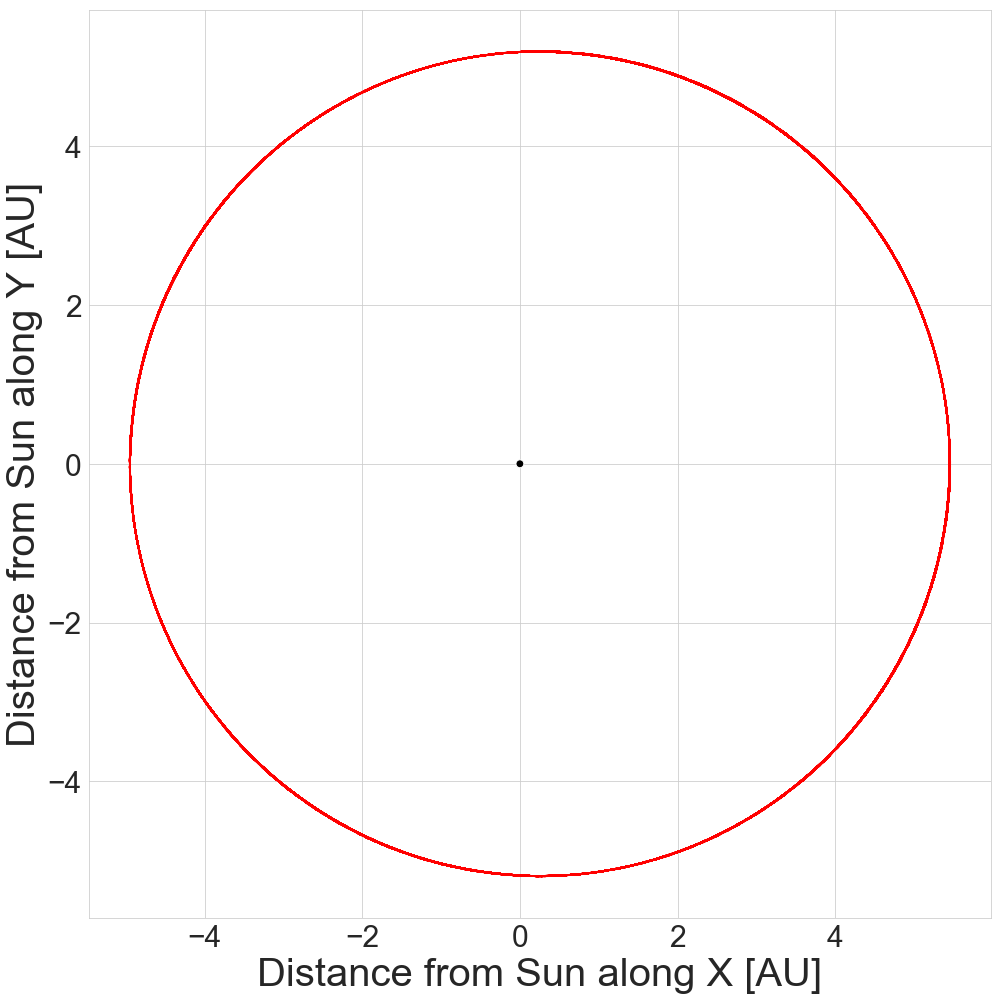

In [72]:
nrows = 1
ncols = 1
picsize = 14
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=((nrows*picsize)*(a/b),nrows*picsize))

axes.plot(data_adaptive[::steps,1], data_adaptive[::steps,2], c='red')

axes.set_xlabel('Distance from Sun along X [AU]', fontsize=40)
axes.set_ylabel('Distance from Sun along Y [AU]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

Sun = Circle((0, 0), 0.05, fc='k', zorder=10)
axes.add_patch(Sun)

fig.tight_layout()
plt.savefig(image_path +
            'orbit_jupyter.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

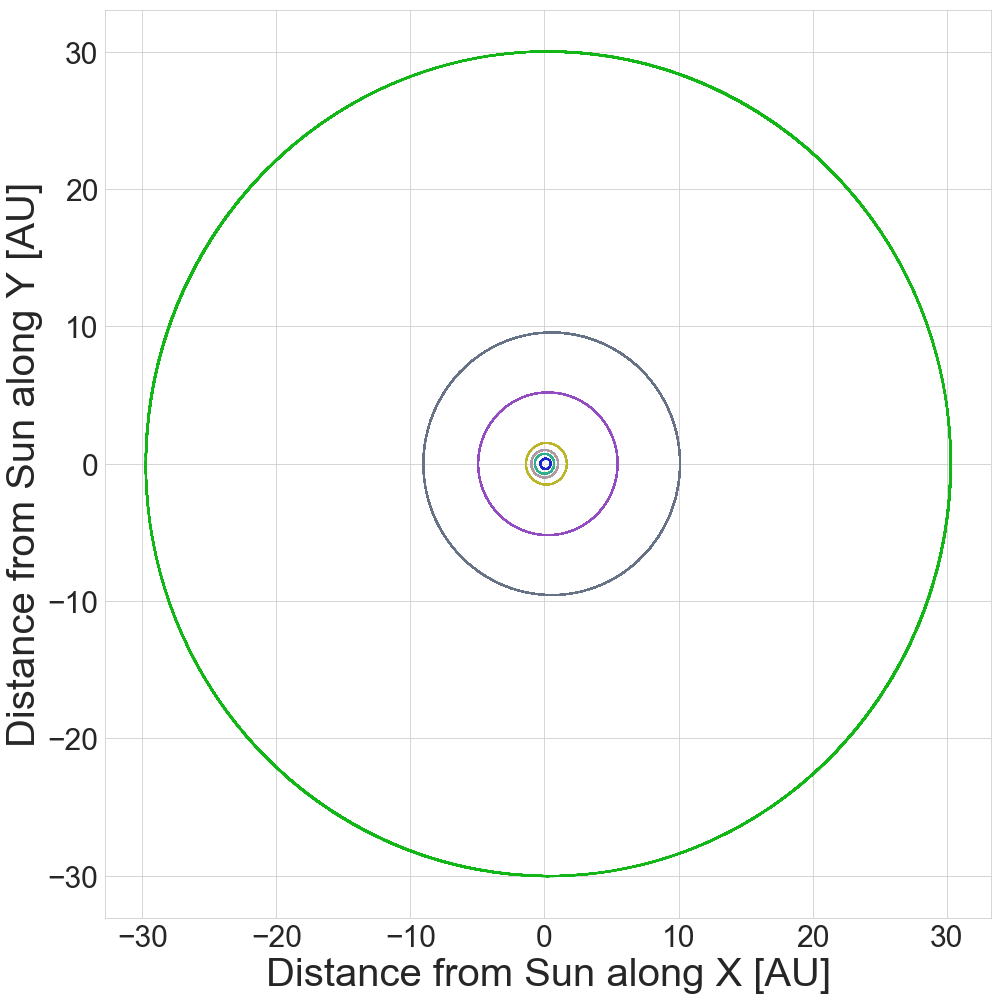

In [88]:
nrows = 1
ncols = 1
picsize = 14
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=((nrows*picsize)*(a/b),nrows*picsize))

for keys, values in Planets.items():
    if (keys != 'Halley' and
        keys != 'Pluto' and
        keys != 'Neptune' and
        keys != 'Uranus'):
        color = np.array((np.random.rand(),np.random.rand(),np.random.rand()))
        # Aphelion distance in AU
        r_ap = Planets[keys][0]
        # Eccentricity
        ecc = Planets[keys][1]
        current_mode = mode_choose()
        os.system(current_mode)
        data_adaptive = np.genfromtxt('adaptive.dat')
        axes.plot(data_adaptive[::steps,1], data_adaptive[::steps,2], c=color)

    
axes.set_xlabel('Distance from Sun along X [AU]', fontsize=40)
axes.set_ylabel('Distance from Sun along Y [AU]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

Sun = Circle((0, 0), 0.05, fc='k', zorder=10)
axes.add_patch(Sun)

fig.tight_layout()
plt.savefig(image_path +
            'orbit_all.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()